In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
load_iris()
iris = pd.DataFrame(data=load_iris().data,columns=load_iris().feature_names)
iris['target'] = load_iris().target
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df = iris.copy()

In [4]:
df.shape

(150, 5)

In [5]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [6]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int32
dtype: object

In [7]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [8]:
x = df.iloc[:,:-1] # x=df[['sepal_length','sepal_width','petal_length','petal_width']]
y = df.iloc[:,-1]
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [11]:
from sklearn.tree import DecisionTreeClassifier

### Criterion = 'Gini'

In [12]:
dt1 = DecisionTreeClassifier(criterion='gini')
dt1.fit(x_train,y_train)

DecisionTreeClassifier()

In [13]:
print('Training Accuracy',dt1.score(x_train,y_train))
print('Testing Accuracy',dt1.score(x_test,y_test))

Training Accuracy 1.0
Testing Accuracy 1.0


In [14]:
y_pred = dt1.predict(x_test)
y_pred

array([2, 0, 2, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 0, 0,
       0, 1, 2, 2, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 2, 1])

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

In [16]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[16  0  0]
 [ 0 10  0]
 [ 0  0 12]]


In [17]:
res = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
res.head()

,y_test,y_pred
135,2,2
42,0,0
134,2,2
69,1,1
72,1,1


In [18]:
cm_df = res.groupby(['y_test','y_pred'])['y_pred'].count()
cm_df

y_test  y_pred
0       0         16
1       1         10
2       2         12
Name: y_pred, dtype: int64

In [19]:
print(cm)

[[16  0  0]
 [ 0 10  0]
 [ 0  0 12]]


In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [21]:
from sklearn import tree

In [22]:
# fn = feature_names
# cn = class_names
fn = x.columns
print(fn)
cn = ['Iris-setosa','Iris-versicolor','Iris-virginica']
print(cn)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')
['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


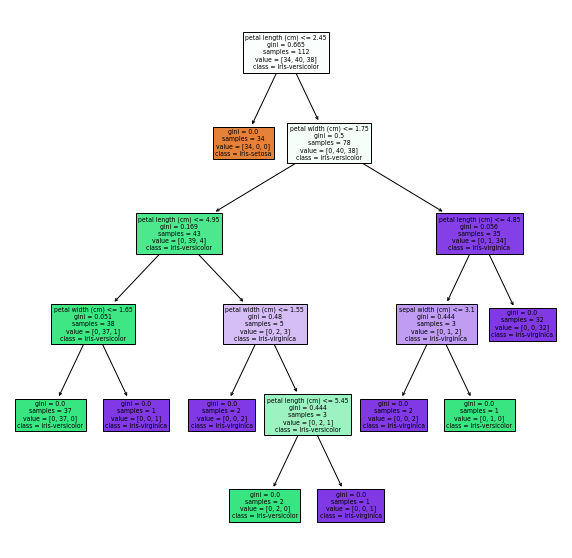

In [23]:
plt.figure(figsize=(10,10))
tree.plot_tree(dt1,feature_names=fn,class_names=cn,filled=True)
plt.show()

### Criterion = 'Entropy'

In [24]:
dt2 = DecisionTreeClassifier(criterion='entropy')
dt2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [25]:
print('Training Accuracy',dt2.score(x_train,y_train))
print('Testing Accuracy',dt2.score(x_test,y_test))

Training Accuracy 1.0
Testing Accuracy 1.0


In [26]:
y_pred = dt2.predict(x_test)
y_pred

array([2, 0, 2, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 0, 0,
       0, 1, 2, 2, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 2, 1])

In [27]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[16  0  0]
 [ 0 10  0]
 [ 0  0 12]]


In [28]:
res1 = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
res1.head()

,y_test,y_pred
135,2,2
42,0,0
134,2,2
69,1,1
72,1,1


In [29]:
cm_df = res1.groupby(['y_test','y_pred'])['y_pred'].count()
cm_df

y_test  y_pred
0       0         16
1       1         10
2       2         12
Name: y_pred, dtype: int64

In [30]:
print(cm)

[[16  0  0]
 [ 0 10  0]
 [ 0  0 12]]


In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [32]:
# fn = feature_names
# cn = class_names
fn = x.columns
print(fn)
cn = ['Iris-setosa','Iris-versicolor','Iris-virginica']
print(cn)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')
['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


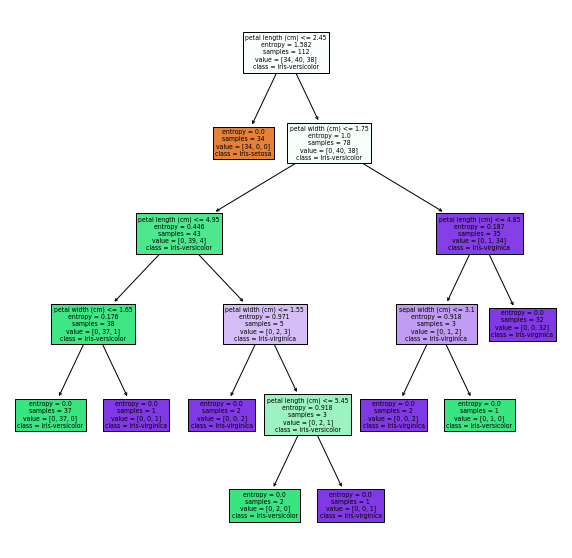

In [33]:
plt.figure(figsize=(10,10))
tree.plot_tree(dt2,feature_names=fn,class_names=cn,filled=True)
plt.show()

### Parameters of DT 
1) criterion - 'gini or 'entropy'<br>
2) max_depth - specifies the depth of the tree<br>
3) min_samples_split - The minimum number of samples required to split an internal node

In [34]:
dt3 = DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_split=6)
dt3.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=6)

In [35]:
print('Training Accuracy',dt3.score(x_train,y_train))
print('Testing Accuracy',dt3.score(x_test,y_test))

Training Accuracy 0.9642857142857143
Testing Accuracy 1.0


In [36]:
y_pred_dt3 = dt3.predict(x_test)
y_pred_dt3

array([2, 0, 2, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 0, 0,
       0, 1, 2, 2, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 2, 1])

In [37]:
cm = confusion_matrix(y_test,y_pred_dt3)
print(cm)

[[16  0  0]
 [ 0 10  0]
 [ 0  0 12]]


In [38]:
print(classification_report(y_test,y_pred_dt3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



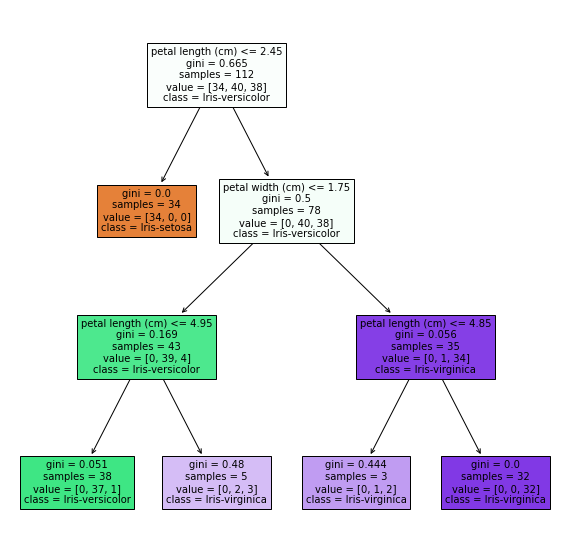

In [39]:
plt.figure(figsize=(10,10))
tree.plot_tree(dt3,feature_names=fn,class_names=cn,filled=True)
plt.show()

### Cross Validation
No of folds = 5 (by default)

In [40]:
from sklearn.model_selection import cross_val_score

### CV for max_depth

In [41]:
max_depth = [2,3,4,5]
for i in max_depth:
    score = cross_val_score(DecisionTreeClassifier(max_depth=i),x,y) #cv=5
#     print(f'At max_depth {i} Accuarcy is {score}')
    print('At max_depth',i,'Mean_Accuarcy is',score.mean())

At max_depth 2 Mean_Accuarcy is 0.9333333333333332
At max_depth 3 Mean_Accuarcy is 0.96
At max_depth 4 Mean_Accuarcy is 0.9533333333333334
At max_depth 5 Mean_Accuarcy is 0.9666666666666668


### CV for min_samples_split

In [42]:
mss = [4,6,8,10,12,14,16,18,20]
for i in mss:
    score = cross_val_score(DecisionTreeClassifier(min_samples_split=i),x,y) #cv=5
#     print(f'At max_depth {i} Accuarcy is {score}')
    print('At Min_Samples_split',i,'Mean_Accuarcy is',score.mean())

At Min_Samples_split 4 Mean_Accuarcy is 0.9666666666666668
At Min_Samples_split 6 Mean_Accuarcy is 0.9666666666666668
At Min_Samples_split 8 Mean_Accuarcy is 0.9666666666666668
At Min_Samples_split 10 Mean_Accuarcy is 0.9666666666666668
At Min_Samples_split 12 Mean_Accuarcy is 0.9666666666666668
At Min_Samples_split 14 Mean_Accuarcy is 0.9666666666666668
At Min_Samples_split 16 Mean_Accuarcy is 0.9666666666666668
At Min_Samples_split 18 Mean_Accuarcy is 0.9666666666666668
At Min_Samples_split 20 Mean_Accuarcy is 0.9666666666666668


### CV for criterion

In [43]:
criterion = ['gini','entropy']
for i in criterion:
    score = cross_val_score(DecisionTreeClassifier(criterion=i),x,y) #cv=5
#     print(f'At max_depth {i} Accuarcy is {score}')
    print('At criterion',i,'Mean_Accuarcy is',score.mean())

At criterion gini Mean_Accuarcy is 0.9600000000000002
At criterion entropy Mean_Accuarcy is 0.9600000000000002


In [44]:
dt5 = DecisionTreeClassifier(criterion='gini',max_depth=5, min_samples_split=6)
dt5.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=6)

In [45]:
print('Training Accuracy',dt5.score(x_train,y_train))
print('Testing Accuracy',dt5.score(x_test,y_test))

Training Accuracy 0.9732142857142857
Testing Accuracy 1.0
